In [1]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import KNNBasic, KNNWithMeans
import matplotlib.pyplot as plt
import numpy as np

file_path = os.path.expanduser('/Users/xinyi/ml-latest-small/ratings.csv')
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

In [6]:
sim_options = {'name': 'pearson'}

def knn_coll_filter(data, sim_options = sim_options, cv = 10, x = range(2, 101, 2)):
    sim_options = sim_options
    avg_rmse = [0] * len(x)
    avg_mae = [0] * len(x)
    for k in x:
        algo = KNNWithMeans(k, sim_options = sim_options)
        a = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = cv)
        test_rmse = a['test_rmse']
        test_mae = a['test_mae']
        avg_rmse[int(k / 2 - 1)] = sum(test_rmse) / len(test_rmse)
        avg_mae[int(k / 2 - 1)] = sum(test_mae) / len(test_mae)
        print (k / 2 - 1)
        print (avg_rmse[int(k / 2 - 1)])
        print (avg_mae[int(k / 2 - 1)])
    return x, avg_rmse, avg_mae

Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
0.0
1.05189575953
0.811753015399
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
10.0
0.920238387489
0.701629084385
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pe

Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
20.0
0.918034819882
0.699559263201
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix

Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
30.0
0.917650334236
0.699656201051
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done co

Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
40.0
0.917805695662
0.699799930642
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
41.0
0.918253052206
0.699789215203
Computing the pearson similarity matrix...
Comput

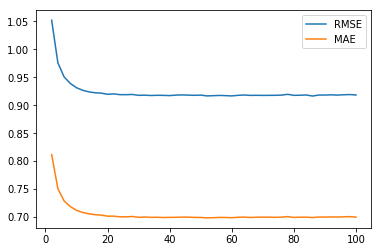

In [7]:
x, avg_rmse, avg_mae = knn_coll_filter(data)
####
plt.plot(x, avg_rmse, label='RMSE')
plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

Question 11: minimum k =22

In [12]:
print ("Avg_RMSE: ",avg_rmse[10])
print ("Avg_MAE: ",avg_mae[10])

Avg_RMSE:  0.920238387489
Avg_MAE:  0.701629084385


Question 12

In [13]:
from surprise.model_selection import KFold
from surprise import accuracy

x = range(2, 101, 2)

# the trim function is used to process the testset
# by default the trim function don't do anything
def knn_filter_trim(trim = lambda x : x):
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    rmse_list = []
    for k in x:
        rmse = 0
        algo = KNNWithMeans(k, sim_options = sim_options)
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset = trim(testset)
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / n_splits)
    return rmse_list

In [14]:
def trim(testset, trim_condition = lambda x : x <= 2):
    movie_map = dict()
    for i in testset:
        movie = i[1]
        movie_map[movie] = 1 if (movie not in movie_map) else movie_map[movie] + 1
    for movie_id in movie_map:
        # meaning that this item should be trimmed
        if trim_condition(movie_map[movie_id]):
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0488
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0397
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0466
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0715
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0452
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0422
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0477
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0650
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0517
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0528
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9850
Computing 

Done computing similarity matrix.
RMSE: 0.9164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9108
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9328
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9215
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9108
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9247
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9217
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9206
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9336
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9165
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9241
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9123
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9111
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9104
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9103
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9192
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9228
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9137
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8932
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9198
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.89

Done computing similarity matrix.
RMSE: 0.9183
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9165
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9110
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9009
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9246
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9201
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9094
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9129
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9119
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9285
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9323
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9180
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9199
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9037
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9082
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9252
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9117
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9151
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9155
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9189
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9184
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.90

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9211
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9119
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9301
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8964
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9037
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9160
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9143
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9219
Computing 

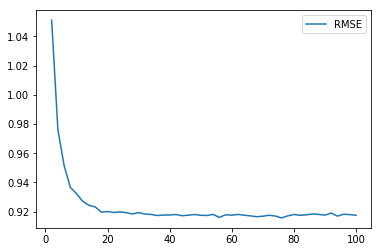

In [15]:
def trim_popular(testset):
    return trim(testset)
rmse_popular_list = knn_filter_trim(trim_popular)

plt.plot(x, rmse_popular_list, label='RMSE')
plt.legend()
plt.show()

In [24]:
print(rmse_popular_list)
print("Minimum average RMSE for popular list= ", min(rmse_popular_list))

[1.0511171816695855, 0.97628241083162237, 0.95163793054106505, 0.93667419028500465, 0.93231321548193535, 0.92712004560272321, 0.92432513516592008, 0.92328481715029409, 0.91967089241923416, 0.92010567966185108, 0.91946823618438034, 0.91983108669209934, 0.91934192053204455, 0.91841281820392795, 0.91941039881811815, 0.9183627629990434, 0.91812218995624595, 0.91736918244592458, 0.91771099119309196, 0.91773673170887915, 0.9180708677156828, 0.91722652317026188, 0.91759258193476934, 0.91805541929216739, 0.91750780581152913, 0.9174002129479657, 0.91812975493188065, 0.91608246773765756, 0.91786144342196307, 0.91760083975826812, 0.9181167952675604, 0.91755795827388964, 0.91713257916003388, 0.91656938096696938, 0.91689448545660213, 0.91754075999559603, 0.91704527150312243, 0.91572986203868312, 0.91711028413515139, 0.91807486168474117, 0.91753412760509501, 0.91786492976846057, 0.91842217640214052, 0.91812127735424143, 0.91765919492685166, 0.91903575685867533, 0.91695819079644136, 0.918217803484045

Question 13

In [19]:
def trim_unpopular(testset):
    return trim(testset, trim_condition = lambda x : x > 2)

rmse_unpopular_list = knn_filter_trim(trim_unpopular)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0547
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0697
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0436
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0438
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0447
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0508
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0485
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0462
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0492
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9797
Computing 

Done computing similarity matrix.
RMSE: 0.9261
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9112
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9112
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9143
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9239
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9247
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9206
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9105
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8994
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9086
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9150
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9191
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9382
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9091
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9268
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9097
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9129
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9203
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9147
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.92

Done computing similarity matrix.
RMSE: 0.9230
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9210
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9056
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9235
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9155
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9256
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9182
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9274
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9266
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9042
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9062
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9090
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9145
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9145
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9218
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9087
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9306
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9275
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.90

Done computing similarity matrix.
RMSE: 0.9098
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9395
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9051
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9248
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9194
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9138
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9178
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9053
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9310
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9256
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9084
Computing the pearson similarity matrix...
Done compu

In [27]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

thresholds = [2.5, 3, 3.5, 4]
k = 22
sim_options = {'name': 'pearson'}

trainset, testset = train_test_split(data, test_size = 0.1)
algo = KNNWithMeans(k, sim_options = sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

label_true = [x[2] for x in predictions]
label_esti = [x[3] for x in predictions]

for threshold in thresholds:
    binary_true = map(lambda x : 0 if x < threshold else 1, label_true)
    fpr, tpr, _ = roc_curve(binary_true, label_esti)
    roc_auc = auc(fpr,tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve when threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.


ValueError: Expected array-like (array or non-string sequence), got <map object at 0x110f68cf8>

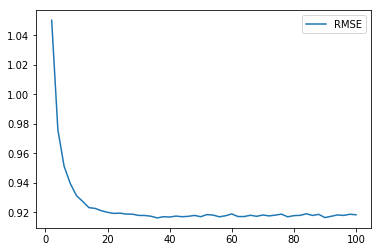

In [20]:
plt.plot(x, rmse_unpopular_list, label='RMSE')
plt.legend()
plt.show()

In [22]:
print("Minimum average RMSE for unpopular list = ", min(rmse_unpopular_list))

Minimum average RMSE for unpopular list =  0.916178820976


Question 14

In [23]:
def trim_high_variance(testset):
    movie_map = dict()
    for (user, movie, rate) in movie_map:
        if (movie in movie_map):
            movie_map[movie].append(rate)
        else:
            movie_map[movie] = [rate]
    for movie_id in movie_map:
        rating = movie_map[movie_id]
        if len(rating) < 5 or np.var(np.array(rating)) < 2:
            testset = filter(lambda x: x[1] != movie_id, testset)
    return testset

rmse_high_variance_list = knn_filter_trim(trim_high_variance)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0457
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0520
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0425
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0535
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0340
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0471
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0636
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0565
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0482
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0597
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9861
Computing 

Done computing similarity matrix.
RMSE: 0.9134
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9264
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9277
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9212
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9192
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9261
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9106
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9122
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9310
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9294
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9122
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9292
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9159
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9111
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9213
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9114
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9162
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9180
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9029
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9183
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.92

Done computing similarity matrix.
RMSE: 0.9233
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9189
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9076
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9310
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9184
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9025
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9276
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9170
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9099
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9138
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9237
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9212
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9196
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9123
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9165
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9127
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9110
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9231
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9216
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9277
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.92

Done computing similarity matrix.
RMSE: 0.9185
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9158
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9202
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9036
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9195
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9179
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9136
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9268
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9132
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9184
Computing the pearson similarity matrix...
Done compu

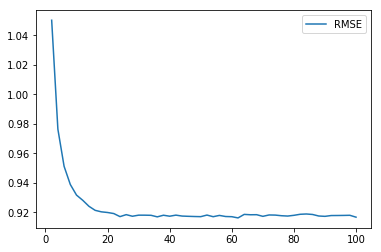

In [25]:
plt.plot(x, rmse_high_variance_list, label='RMSE')
plt.legend()
plt.show()

In [26]:
print("Minimum average RMSE for high_variance_list = ", min(rmse_high_variance_list))

Minimum average RMSE for high_variance_list =  0.916230075784


Question 15

Computing the pearson similarity matrix...
Done computing similarity matrix.


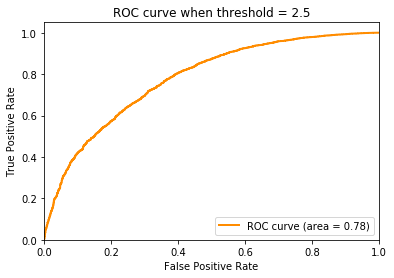

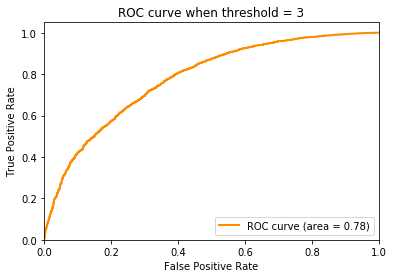

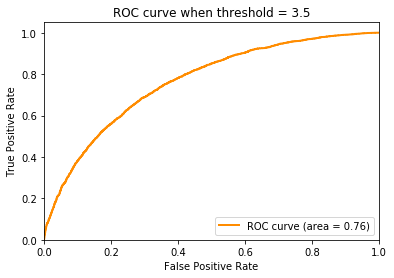

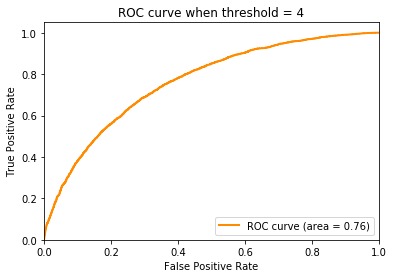

In [47]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np 

thresholds = [2.5, 3, 3.5, 4]
k = 22
sim_options = {'name': 'pearson'}

trainset, testset = train_test_split(data, test_size = 0.1)
algo = KNNWithMeans(k, sim_options = sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

label_true = [x[2] for x in predictions]
label_esti = [x[3] for x in predictions]

for threshold in thresholds:
    binary_true = map(lambda x : 0 if x < threshold else 1, label_true)
    binary_true = np.array(list(binary_true))
    fpr, tpr, _ = roc_curve(binary_true, label_esti)
    roc_auc = auc(fpr,tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve when threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()

In [53]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise.model_selection import cross_validate

data = Dataset.load_builtin('ml-100k')
ks = np.linspace(2, 100, num=50)
bsl_options = {'name': 'pearson_baseline'}


In [54]:
outputs = []
for k in ks:
    algo = BaselineOnly(bsl_options=bsl_options)
    outputs.append(cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10))

avg_rmses = []
avg_maes = []
for output in outputs:
    #average the test_rmse
    avg_rmses.append(np.mean(output['test_rmse']))
    
    #average the test_mae
    avg_maes.append(np.mean(output['test_mae']))


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

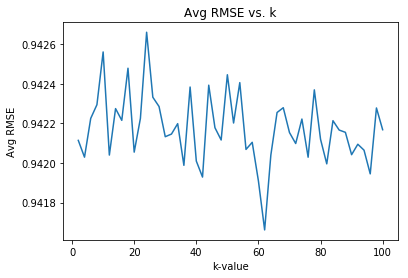

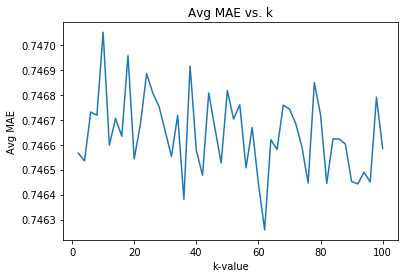

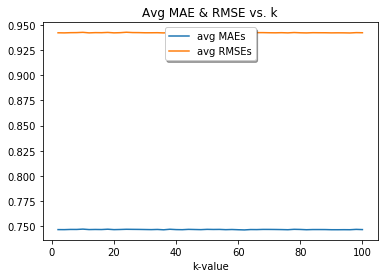

In [55]:
def plotStats(avg_rmses=None, avg_maes=None):
    if avg_rmses is not None:
        ax = plt.subplot(111)
        width = 2

        plt.title("Avg RMSE vs. k")
        plt.ylabel("Avg RMSE")
        plt.xlabel("k-value")
        ax.plot(ks, avg_rmses)
        plt.show()

    if avg_maes is not None:
        ax = plt.subplot(111)
        width = 2

        plt.title("Avg MAE vs. k")
        plt.ylabel("Avg MAE")
        plt.xlabel("k-value")
        ax.plot(ks, avg_maes)
        plt.show()

    if avg_rmses is not None and avg_maes is not None:
        ax = plt.subplot(111)
        width = 2

        plt.title("Avg MAE & RMSE vs. k")
        plt.xlabel("k-value")
        ax.plot(ks, avg_maes, label="avg MAEs")
        ax.plot(ks, avg_rmses, label="avg RMSEs")
        legend = ax.legend(loc='upper center', shadow=True)
        plt.show()

    
plotStats(avg_rmses=avg_rmses, avg_maes=avg_maes)